# Hole swiss roll

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE

In [10]:
X_sel, sh_color = make_swiss_roll(
    n_samples=2500, hole=True, random_state=0
)

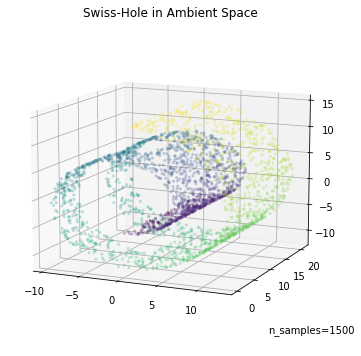

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X_sel[:, 0], X_sel[:, 1], X_sel[:, 2], c=sh_color, s=5, alpha=.2
)
ax.set_title("Swiss-Hole in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [3]:
#######
# LLE #
#######

n_components = 2
n_neighbors = 15
random_state = 1234
max_iter = 100

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,
                            max_iter=max_iter, random_state=random_state)
lle.fit(X_sel)
X_lle = lle.transform(X_sel)

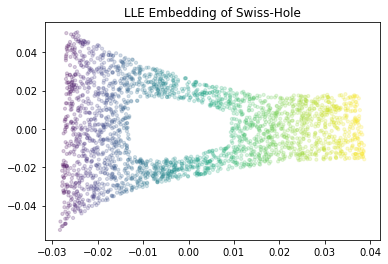

In [14]:
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=sh_color, s=10, alpha=0.2)
plt.title("LLE Embedding of Swiss-Hole")
plt.show()

In [5]:
##########
# Isomap #
##########

n_components = 2
n_neighbors = 15
metric = 'l1' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
max_iter = 150

isom = Isomap(n_neighbors=n_neighbors, n_components=n_components, metric=metric,
              max_iter=max_iter)
isom.fit(X_sel)
X_isom = isom.transform(X_sel)

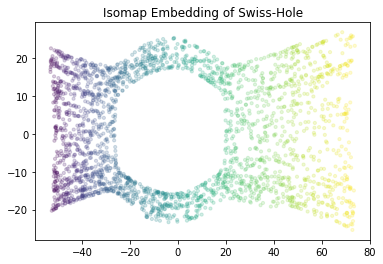

In [12]:
plt.scatter(X_isom[:, 0], X_isom[:, 1], c=sh_color, s=10, alpha=0.2)
plt.title("Isomap Embedding of Swiss-Hole")
plt.show()

In [ ]:
##########
# T-SNE  #
##########

n_components = 2
perplexity = 50
metric = 'l1' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
random_state = 1234
max_iter = 500
n_iter_without_progress=150

tsn = TSNE(perplexity=perplexity, n_components=n_components, metric=metric,
           n_iter = max_iter, n_iter_without_progress=n_iter_without_progress, random_state=random_state)
X_tsn = tsn.fit_transform(X_sel)

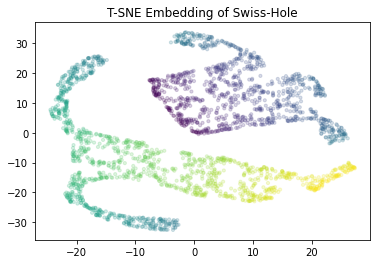

In [13]:
plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c=sh_color, s=10, alpha=0.2)
plt.title("T-SNE Embedding of Swiss-Hole")
plt.show()